In [102]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6543729b-3119-4097-a112-9a49241e6bb0',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-06-09T14:28:34.916Z', 'error_code': 0, 'error_message': None, 'elapsed': 38, 'credit_count': 1, 'notice': None, 'total_count': 10066}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11105, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [104]:
type(data)

dict

In [106]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [108]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11105,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19709968.00000,19709968.00000,False,NaN,1,NaN,NaN,None,2024-06-09T14:27:00.000Z,69430.38312,12549449378.11622,-53.81740,-0.03340,0.19440,1.79330,11.28539,0.98448,-3.74293,1368470629501.56592,53.80150,1458038045497.22998,None,2024-06-09T14:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-09 19:58:49.082258
1,1027,Ethereum,ETH,ethereum,9053,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120151345.15826,120151345.15826,True,NaN,2,NaN,NaN,None,2024-06-09T14:26:00.000Z,3691.96240,7927420055.47907,-51.48550,0.04431,0.28360,-2.72739,23.38359,6.12829,-8.60571,443594248692.86267,17.43670,443594248692.85999,None,2024-06-09T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-09 19:58:49.082258
2,825,Tether USDt,USDT,tether,88100,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112451964717.42813,115086088089.50818,True,NaN,3,NaN,NaN,None,2024-06-09T14:26:00.000Z,0.99996,39094826478.68954,-46.13790,-0.00777,0.03000,0.06691,-0.00229,0.03172,-0.03559,112447039185.48677,4.42000,115081047179.78000,None,2024-06-09T14:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-09 19:58:49.082258
3,1839,BNB,BNB,bnb,2179,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147564475.55288,147564475.55288,False,NaN,4,NaN,NaN,None,2024-06-09T14:26:00.000Z,680.38046,1845321540.63060,-29.68330,-0.15678,-0.57143,13.25320,14.79004,16.01423,31.04175,100399985406.67819,3.94650,100399985406.67999,None,2024-06-09T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-09 19:58:49.082258
4,5426,Solana,SOL,solana,678,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,460670115.69202,577706390.20108,True,NaN,5,NaN,NaN,None,2024-06-09T14:26:00.000Z,161.03199,1569148701.81676,-51.50290,0.54913,0.54934,-2.55507,6.63886,-3.82180,8.54811,74182625043.09383,2.91600,93029209122.69000,None,2024-06-09T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-09 19:58:49.082258
5,3408,USDC,USDC,usd-coin,19663,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32219272006.17273,32219272006.17273,False,NaN,6,NaN,NaN,None,2024-06-09T14:26:00.000Z,1.00006,2573584665.19929,-56.24750,-0.01040,0.00412,0.00551,0.00767,-0.00509,0.02261,32221358928.49693,1.26660,32221358928.50000,None,2024-06-09T14:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-09 19:58:49.082258
6,52,XRP,XRP,xrp,1339,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55506158411.00000,99987553871.00000,False,NaN,7,NaN,NaN,None,2024-06-09T14:27:00.000Z,0.49486,726545588.43096,-66.28330,-0.33414,0.27063,-4.30913,-2.67665,-18.10080,-20.51155,27467767993.70599,1.08010,49485982781.08000,None,2024-06-09T14:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-09 19:58:49.082258
7,74,Dogecoin,DOGE,dogecoin,985,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144638556383.70523,144638556383.70523,True,NaN,8,NaN,NaN,None,2024-06-09T14:27:00.000Z,0.14648,737135773.09563,-56.83390,0.11285,0.62639,-7.96784,-0.91666,-22.74241,-15.84107,21186840118.52373,0.83310,21186840118.52000,None,2024-06-09T14:27:00.000Z,NaN

In [110]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '6543729b-3119-4097-a112-9a49241e6bb0',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df2=pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now')
    df
    if not os.path.isfile(r'C:\Users\K Suresh\Desktop\Data Analytics\API.csv'):
        df.to_csv(r'C:\Users\K Suresh\Desktop\Data Analytics\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\K Suresh\Desktop\Data Analytics\API.csv',mode='a',header=False)

In [112]:
import os
from time import time
from time import sleep
for i in range(333):
    api_runner()
    print("API Runner Completed")
    sleep(60)
exit()

API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [152]:
df=pd.read_csv(r'C:\Users\K Suresh\Desktop\Data Analytics\API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11105,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19709331.00000,19709331.00000,False,NaN,1,NaN,NaN,NaN,2024-06-08T06:42:00.000Z,69359.63821,34582908168.03998,33.28710,0.15157,-2.61563,2.61916,12.55614,-2.03037,-0.06116,1367032067548.22949,53.59760,1456552402438.87012,NaN,2024-06-08T06:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-08 12:13:15.293867
1,1,1027,Ethereum,ETH,ethereum,9048,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120147950.30533,120147950.30533,True,NaN,2,NaN,NaN,NaN,2024-06-08T06:41:00.000Z,3685.49821,17939132582.83122,36.77070,0.10787,-3.36213,-2.54924,22.79294,0.68855,-6.53627,442805056325.37067,17.36580,442805056325.37000,NaN,2024-06-08T06:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-08 12:13:15.293867
2,2,825,Tether USDt,USDT,tether,88067,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112453114731.33092,115086088103.16122,True,NaN,3,NaN,NaN,NaN,2024-06-08T06:41:00.000Z,0.99956,81365964728.39085,39.15480,0.00006,-0.01747,0.03149,0.01358,-0.06331,-0.20255,112404131325.36548,4.40820,115035957801.41000,NaN,2024-06-08T06:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-08 12:13:15.293867
3,3,1839,BNB,BNB,bnb,2179,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147564568.68704,147564568.68704,False,NaN,4,NaN,NaN,NaN,2024-06-08T06:41:00.000Z,687.55557,2864125783.87701,-2.57050,0.46829,-2.66481,15.54812,14.66591,18.14446,38.89804,101458841621.48224,3.97890,101458841621.48000,NaN,2024-06-08T06:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-08 12:13:15.293867
4,4,5426,Solana,SOL,solana,678,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,460574673.72513,577714410.64478,True,NaN,5,NaN,NaN,NaN,2024-06-08T06:41:00.000Z,162.64527,3219776299.29229,56.05050,0.12776,-5.42427,-2.50508,12.01993,-7.82181,10.38809,74910290346.23958,2.93780,93962514023.16000,NaN,2024-06-08T06:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-08 12:13:15.293867
5,5,3408,USDC,USDC,usd-coin,19646,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32196248294.81291,32196248294.81291,False,NaN,6,NaN,NaN,NaN,2024-06-08T06:41:00.000Z,1.00002,7042305774.35539,25.25800,0.00409,0.00336,-0.00700,0.01053,0.00657,0.02006,32196926827.30600,1.26270,32196926827.31000,NaN,2024-06-08T06:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-08 12:13:15.293867
6,6,52,XRP,XRP,xrp,1339,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55506158411.00000,99987553871.00000,False,NaN,7,NaN,NaN,NaN,2024-06-08T06:42:00.000Z,0.49896,2374784461.12587,108.87040,-0.15189,-4.82679,-3.81178,-4.28395,-19.02810,-20.08642,27695603132.54615,1.08590,49896450998.23000,NaN,2024-06-08T06:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-08 12:13:15.293867
7,7,74,Dogecoin,DOGE,dogecoin,984,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144619916383.70526,144619916383.70526,True,NaN,8,NaN,NaN,NaN,2024-06-08T06:42:00.000Z,0.14787,1687733676.70807,94.36230,-0.21854,-8.44995,-7.08287,0.17740,-25.72641,-16.16522,21385161320.12305,0.83850,21385161320.12000,NaN,2024-06-08T06:42

In [154]:
pd.set_option('display.float_format',lambda x:'%.5f'%x)

In [156]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11105,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19709331.00000,19709331.00000,False,NaN,1,NaN,NaN,NaN,2024-06-08T06:42:00.000Z,69359.63821,34582908168.03998,33.28710,0.15157,-2.61563,2.61916,12.55614,-2.03037,-0.06116,1367032067548.22949,53.59760,1456552402438.87012,NaN,2024-06-08T06:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-08 12:13:15.293867
1,1,1027,Ethereum,ETH,ethereum,9048,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120147950.30533,120147950.30533,True,NaN,2,NaN,NaN,NaN,2024-06-08T06:41:00.000Z,3685.49821,17939132582.83122,36.77070,0.10787,-3.36213,-2.54924,22.79294,0.68855,-6.53627,442805056325.37067,17.36580,442805056325.37000,NaN,2024-06-08T06:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-08 12:13:15.293867
2,2,825,Tether USDt,USDT,tether,88067,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112453114731.33092,115086088103.16122,True,NaN,3,NaN,NaN,NaN,2024-06-08T06:41:00.000Z,0.99956,81365964728.39085,39.15480,0.00006,-0.01747,0.03149,0.01358,-0.06331,-0.20255,112404131325.36548,4.40820,115035957801.41000,NaN,2024-06-08T06:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-08 12:13:15.293867
3,3,1839,BNB,BNB,bnb,2179,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147564568.68704,147564568.68704,False,NaN,4,NaN,NaN,NaN,2024-06-08T06:41:00.000Z,687.55557,2864125783.87701,-2.57050,0.46829,-2.66481,15.54812,14.66591,18.14446,38.89804,101458841621.48224,3.97890,101458841621.48000,NaN,2024-06-08T06:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-08 12:13:15.293867
4,4,5426,Solana,SOL,solana,678,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,460574673.72513,577714410.64478,True,NaN,5,NaN,NaN,NaN,2024-06-08T06:41:00.000Z,162.64527,3219776299.29229,56.05050,0.12776,-5.42427,-2.50508,12.01993,-7.82181,10.38809,74910290346.23958,2.93780,93962514023.16000,NaN,2024-06-08T06:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-08 12:13:15.293867
5,5,3408,USDC,USDC,usd-coin,19646,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32196248294.81291,32196248294.81291,False,NaN,6,NaN,NaN,NaN,2024-06-08T06:41:00.000Z,1.00002,7042305774.35539,25.25800,0.00409,0.00336,-0.00700,0.01053,0.00657,0.02006,32196926827.30600,1.26270,32196926827.31000,NaN,2024-06-08T06:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-08 12:13:15.293867
6,6,52,XRP,XRP,xrp,1339,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55506158411.00000,99987553871.00000,False,NaN,7,NaN,NaN,NaN,2024-06-08T06:42:00.000Z,0.49896,2374784461.12587,108.87040,-0.15189,-4.82679,-3.81178,-4.28395,-19.02810,-20.08642,27695603132.54615,1.08590,49896450998.23000,NaN,2024-06-08T06:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-08 12:13:15.293867
7,7,74,Dogecoin,DOGE,dogecoin,984,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144619916383.70526,144619916383.70526,True,NaN,8,NaN,NaN,NaN,2024-06-08T06:42:00.000Z,0.14787,1687733676.70807,94.36230,-0.21854,-8.44995,-7.08287,0.17740,-25.72641,-16.16522,21385161320.12305,0.83850,21385161320.12000,NaN,2024-06-08T06:42

In [158]:
df4=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.03792,-0.21566,1.95567,11.32774,0.80047,-3.13208
Ethereum,-0.02177,-0.26234,-2.69742,23.09288,5.51525,-8.31906
Tether USDt,-0.00430,0.02210,0.06178,-0.00016,0.01931,-0.05837
BNB,-0.08998,-0.82408,13.59807,14.70193,16.50186,32.15583
Solana,0.38930,-0.35932,-2.65157,7.12437,-4.25787,8.76160
USDC,-0.00561,0.00416,0.00408,0.00702,-0.00413,0.02243
XRP,-0.26593,-0.43201,-4.20360,-2.99380,-18.14528,-20.41182
Dogecoin,-0.03059,-0.70654,-7.87989,-0.97882,-22.86591,-15.94639
Toncoin,0.33549,-1.10161,11.27259,7.17144,5.14535,134.60869


In [160]:
df5=df4.stack()
df5

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.03792
              quote.USD.percent_change_24h    -0.21566
              quote.USD.percent_change_7d      1.95567
              quote.USD.percent_change_30d    11.32774
              quote.USD.percent_change_60d     0.80047
              quote.USD.percent_change_90d    -3.13208
Ethereum      quote.USD.percent_change_1h     -0.02177
              quote.USD.percent_change_24h    -0.26234
              quote.USD.percent_change_7d     -2.69742
              quote.USD.percent_change_30d    23.09288
              quote.USD.percent_change_60d     5.51525
              quote.USD.percent_change_90d    -8.31906
Tether USDt   quote.USD.percent_change_1h     -0.00430
              quote.USD.percent_change_24h     0.02210
              quote.USD.percent_change_7d      0.06178
              quote.USD.percent_change_30d    -0.00016
              quote.USD.percent_change_60d     0.01931
              quote.US

In [162]:
type(df5)

pandas.core.series.Series

In [164]:
df6=df5.to_frame(name='values')
df6

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.03792
             quote.USD.percent_change_24h  -0.21566
             quote.USD.percent_change_7d    1.95567
             quote.USD.percent_change_30d  11.32774
             quote.USD.percent_change_60d   0.80047
             quote.USD.percent_change_90d  -3.13208
Ethereum     quote.USD.percent_change_1h   -0.02177
             quote.USD.percent_change_24h  -0.26234
             quote.USD.percent_change_7d   -2.69742
             quote.USD.percent_change_30d  23.09288
             quote.USD.percent_change_60d   5.51525
             quote.USD.percent_change_90d  -8.31906
Tether USDt  quote.USD.percent_change_1h   -0.00430
             quote.USD.percent_change_24h   0.02210
             quote.USD.percent_change_7d    0.06178
             quote.USD.percent_change_30d  -0.00016
             quote.USD.percent_change_60d   0.01931
             quote.USD.percent_change_90d  -0.05837
BNB          quote.USD.percent_change_1h   -0.08998
             quote.USD.percent_change_24h  -0.82408
             quote.USD.percent_change_7d   13.59807
             quote.USD.percent_change_30d  14.70193
             quote.USD.percent_change_60d  16.50186
             quote.USD.percent_change_90d  32.15583
Solana       quote.USD.percent_change_1h    0.38930
             quote.USD.percent_change_24h  -0.35932
             quote.USD.percent_change_7d   -2.65157
             quote.USD.percent_change_30d   7.12437
             quote.USD.percent_change_60d  -4.25787
             quote.USD.percent_change_90d   8.76160
USDC         quote.USD.percent_change_1h   -0.00561
             quote.USD.percent_change_24h   0.00416
             quote.USD.percent_change_7d    0.00408
             quote.USD.percent_change_30d   0.00702
             quote.USD.percent_change_60d  -0.00413
             quote.USD.percent_change_90d   0.02243
XRP          quote.USD.percent_change_1h   -0.26593
             quote.USD.percent_change_24h  -0.43201
             quote.USD.percent_change_7d   -4.20360
             quote.USD.percent_change_30d  -2.99380
             quote.USD.percent_change_60d -18.14528
             quote.USD.percent_change_90d -20.41182
Dogecoin     quote.USD.percent_change_1h   -0.03059
             quote.USD.percent_change_24h  -0.70654
             quote.USD.percent_change_7d   -7.87989
             quote.USD.percent_change_30d  -0.97882
             quote.USD.percent_change_60d -22.86591
             quote.USD.percent_change_90d -15.94639
Toncoin      quote.USD.percent_change_1h    0.33549
             quote.USD.percent_change_24h  -1.10161
             quote.USD.percent_change_7d   11.27259
             quote.USD.percent_change_30d   7.17144
             quote.USD.percent_change_60d   5.14535
             quote.USD.percent_change_90d 134.60869
Cardano      quote.USD.percent_change_1h   -0.05550
             quote.USD.percent_change_24h   0.16833
             quote.USD.percent_change_7d   -2.33596
             quote.USD.percent_change_30d  -4.27596
             quote.USD.percent_change_60d -23.45906
             quote.USD.percent_change_90d -40.28059
Shiba Inu    quote.USD.percent_change_1h    0.15659
             quote.USD.percent_change_24h  -0.61026
             quote.USD.percent_change_7d   -6.40225
             quote.USD.percent_change_30d   1.56878
             quote.USD.percent_change_60d -14.90921
             quote.USD.percent_change_90d -30.45996
Avalanche    quote.USD.percent_change_1h    0.17359
             quote.USD.percent_change_24h  -0.88626
             quote.USD.percent_change_7d   -8.92548
             quote.USD.percent_change_30d  -7.23611
             quote.USD.percent_change_60d -30.10622
             quote.USD.percent_change_90d -31.15353
TRON         quote.USD.percent_change_1h    0.18672
             quote.USD.percent_change_24h   2.18300
             quote.USD.percent_change_7d    1.63732
             quote.USD.percent_change_30d

In [166]:
df6.count()

values    90
dtype: int64

In [168]:
df7=df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03792
1,Bitcoin,quote.USD.percent_change_24h,-0.21566
2,Bitcoin,quote.USD.percent_change_7d,1.95567
3,Bitcoin,quote.USD.percent_change_30d,11.32774
4,Bitcoin,quote.USD.percent_change_60d,0.80047
5,Bitcoin,quote.USD.percent_change_90d,-3.13208
6,Ethereum,quote.USD.percent_change_1h,-0.02177
7,Ethereum,quote.USD.percent_change_24h,-0.26234
8,Ethereum,quote.USD.percent_change_7d,-2.69742
9,Ethereum,quote.USD.percent_change_30d,23.09288


In [170]:
df8=df7.rename(columns={'level_1':'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03792
1,Bitcoin,quote.USD.percent_change_24h,-0.21566
2,Bitcoin,quote.USD.percent_change_7d,1.95567
3,Bitcoin,quote.USD.percent_change_30d,11.32774
4,Bitcoin,quote.USD.percent_change_60d,0.80047
5,Bitcoin,quote.USD.percent_change_90d,-3.13208
6,Ethereum,quote.USD.percent_change_1h,-0.02177
7,Ethereum,quote.USD.percent_change_24h,-0.26234
8,Ethereum,quote.USD.percent_change_7d,-2.69742
9,Ethereum,quote.USD.percent_change_30d,23.09288


In [172]:
df8['percent_change']=df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,-0.03792
1,Bitcoin,24h,-0.21566
2,Bitcoin,7d,1.95567
3,Bitcoin,30d,11.32774
4,Bitcoin,60d,0.80047
5,Bitcoin,90d,-3.13208
6,Ethereum,1h,-0.02177
7,Ethereum,24h,-0.26234
8,Ethereum,7d,-2.69742
9,Ethereum,30d,23.09288


In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

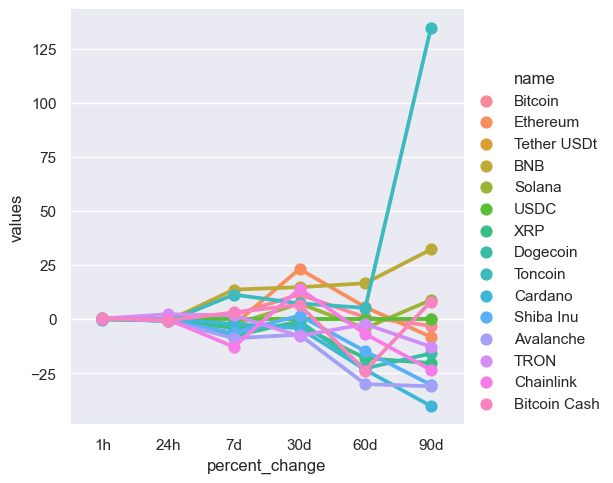

In [176]:
sns.catplot(x='percent_change',y='values',hue='name',data=df8,kind='point')

In [194]:
df10=df[['name','quote.USD.price','timestamp']]
df10=df10.query("name=='Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,69359.63821,2024-06-08 12:13:15.293867
15,Bitcoin,69451.69797,2024-06-09 19:19:40.198884
30,Bitcoin,69430.38312,2024-06-09 19:58:49.082258
45,Bitcoin,69430.38312,2024-06-09 19:58:49.082258
60,Bitcoin,69430.38312,2024-06-09 19:58:49.082258
75,Bitcoin,69430.38312,2024-06-09 19:58:49.082258
90,Bitcoin,69430.38312,2024-06-09 19:58:49.082258


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

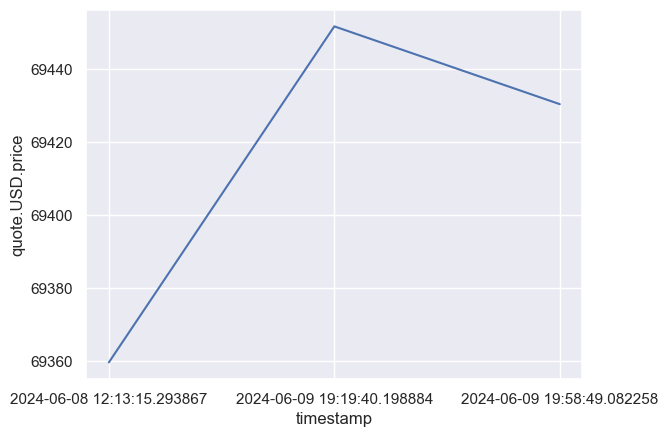

In [196]:
sns.lineplot(x='timestamp',y='quote.USD.price',data=df10)